In [3]:
import pandas as pd
import csv
import requests
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [4]:
#import files
movies_df = pd.read_csv('movies.csv')

In [5]:
actors = requests.get("https://raw.githubusercontent.com/taubergm/HollywoodGenderData/master/all_actors_movies_gender_gold.csv")

with open("all_actors_movies_gender_gold.csv", "w+", encoding='utf-8') as f:
    f.write(actors.text)

In [6]:
actors_df = pd.read_csv('all_actors_movies_gender_gold.csv')

In [7]:
directors = requests.get("https://raw.githubusercontent.com/taubergm/HollywoodGenderData/master/all_directors_gender.csv")

with open("all_directors_gender.csv", "w+", encoding = 'utf-8') as f:
    f.write(directors.text)

In [8]:
directors_df = pd.read_csv('all_directors_gender.csv')

In [9]:
writers = requests.get("https://raw.githubusercontent.com/taubergm/HollywoodGenderData/master/all_writers_gender.csv")

with open("all_writers_gender.csv", "w+", encoding = 'utf-8') as f:
    f.write(writers.text)

In [10]:
writers_df = pd.read_csv('all_writers_gender.csv')

In [11]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
#rename actor column
actors_df.rename(columns = {'starring':'star'}, inplace=True)

In [13]:
actors_df

,year,name,country,budget,gross,runtime,star,language,released,gender
0,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,Tom Cruise,['English'],2000/05/24,male
1,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,Dougray Scott,['English'],2000/05/24,male
2,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,Thandie Newton,['English'],2000/05/24,female
3,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,Richard Roxburgh,['English'],2000/05/24,male
4,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,John Polson,['English'],2000/05/24,male
...,...,...,...,...,...,...,...,...,...,...
20366,2018,Destroyer,['United States'],NaN,NaN,123,Nicole Kidman,['English'],2018/08/31,female
20367,2018,Destroyer,['United States'],NaN,NaN,123,Tatiana Maslany,['English'],2018/08/31,female
20368,2018,Destroyer,['United States'],NaN,NaN,123,Sebastian Stan,['English'],2018/08/31,male
20369,2018,Destroyer,['United States'],NaN,NaN,123,Toby Kebbell,['English'],2018/08/31,male


In [14]:
directors_df.head()

,year,name,country,budget,gross,runtime,director,language,released,gender
0,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,John Woo,['English'],2000/05/24,male
1,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,Ridley Scott,['English'],2000/05/01,male
2,2000,Cast Away,['United States'],90000000,429600000,143,Robert Zemeckis,['English'],2000/12/22,male
3,2000,What Women Want,['United States'],70000000,374100000,127,Nancy Meyers,['English'],2000/12/15,female
4,2000,Dinosaur,['United States'],127500000,349800000,82,Ralph Zondag,['English'],2000/5/19,male


In [15]:
writers_df.head()

,year,name,country,budget,gross,runtime,writer,language,released,gender
0,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,NaN,['English'],2000/05/24,unknown
1,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,NaN,['English'],2000/05/01,unknown
2,2000,Cast Away,['United States'],90000000,429600000,143,William Broyles,['English'],2000/12/22,male
3,2000,Cast Away,['United States'],90000000,429600000,143,Jr.,['English'],2000/12/22,unknown
4,2000,What Women Want,['United States'],70000000,374100000,127,Josh Goldsmith,['English'],2000/12/15,male


In [16]:
#create new df of only useful information
cleaned_df = movies_df[['name','genre','year','score','director','writer','star','budget','gross']].copy()

In [17]:
cleaned_df

,name,genre,year,score,director,writer,star,budget,gross
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0
...,...,...,...,...,...,...,...,...,...
7663,More to Life,Drama,2020,3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,7000.0,NaN
7664,Dream Round,Comedy,2020,4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,NaN,NaN
7665,Saving Mbango,Drama,2020,5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,58750.0,NaN
7666,It's Just Us,Drama,2020,NaN,James Randall,James Randall,Christina Roz,15000.0,NaN


In [18]:
#create a dataframe of just actors and their gender
actor_gender_df = actors_df[['star','gender']].copy()
actor_gender_df = actor_gender_df.drop_duplicates()
actor_gender_df

,star,gender
0,Tom Cruise,male
1,Dougray Scott,male
2,Thandie Newton,female
3,Richard Roxburgh,male
4,John Polson,male
...,...,...
20342,Yahya Abdul Mateen II,unknown
20346,Jorge Lendeborg Jr.,male
20349,Pamela Adlon,female
20353,Merritt Wever,female


In [19]:
#add actor gender column to cleaned_df
cleaned_df = pd.merge(cleaned_df, actor_gender_df, how = 'left', on = 'star')

In [20]:
cleaned_df

,name,genre,year,score,director,writer,star,budget,gross,gender
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,male
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,male
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,male
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,NaN
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,male
...,...,...,...,...,...,...,...,...,...,...
7797,More to Life,Drama,2020,3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,7000.0,NaN,NaN
7798,Dream Round,Comedy,2020,4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,NaN,NaN,NaN
7799,Saving Mbango,Drama,2020,5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,58750.0,NaN,NaN
7800,It's Just Us,Drama,2020,NaN,James Randall,James Randall,Christina Roz,15000.0,NaN,NaN


In [21]:
#rename actor gender column
cleaned_df.rename(columns = {'gender':'actor_gender'}, inplace=True)
cleaned_df

,name,genre,year,score,director,writer,star,budget,gross,actor_gender
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,male
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,male
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,male
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,NaN
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,male
...,...,...,...,...,...,...,...,...,...,...
7797,More to Life,Drama,2020,3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,7000.0,NaN,NaN
7798,Dream Round,Comedy,2020,4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,NaN,NaN,NaN
7799,Saving Mbango,Drama,2020,5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,58750.0,NaN,NaN
7800,It's Just Us,Drama,2020,NaN,James Randall,James Randall,Christina Roz,15000.0,NaN,NaN


In [22]:
#create a dataframe of just directors and their gender
director_gender_df = directors_df[['director','gender']].copy()
director_gender_df = director_gender_df.drop_duplicates()
director_gender_df

,director,gender
0,John Woo,male
1,Ridley Scott,male
2,Robert Zemeckis,male
3,Nancy Meyers,female
4,Ralph Zondag,male
...,...,...
5035,Nadine Labaki,female
5036,Josie Rourke,female
5040,Christian Rivers,male
5041,Bob Persichetti,male


In [23]:
#add director gender column to cleaned_df
cleaned_df = pd.merge(cleaned_df, director_gender_df, how = 'left', on = 'director')

In [24]:
#rename director gender column
cleaned_df.rename(columns = {'gender':'director_gender'}, inplace=True)
cleaned_df

,name,genre,year,score,director,writer,star,budget,gross,actor_gender,director_gender
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,male,NaN
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,male,NaN
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,male,NaN
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,NaN,NaN
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,male,male
...,...,...,...,...,...,...,...,...,...,...,...
7827,More to Life,Drama,2020,3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,7000.0,NaN,NaN,NaN
7828,Dream Round,Comedy,2020,4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,NaN,NaN,NaN,NaN
7829,Saving Mbango,Drama,2020,5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,58750.0,NaN,NaN,NaN
7830,It's Just Us,Drama,2020,NaN,James Randall,James Randall,Christina Roz,15000.0,NaN,NaN,NaN


In [25]:
#create a dataframe of just writers and their gender
writer_gender_df = writers_df[['writer','gender']].copy()
writer_gender_df = writer_gender_df.drop_duplicates()
writer_gender_df

,writer,gender
0,NaN,unknown
2,William Broyles,male
3,Jr.,unknown
4,Josh Goldsmith,male
5,Cathy Yuspa,female
...,...,...
5914,Carey Van Dyke,male
5915,Shane Van Dyke,male
5922,Elaine Goldsmith Thomas,female
5928,Janusz G\xc5\x82owacki,unknown


In [26]:
#add writer gender column to cleaned_df
cleaned_df = pd.merge(cleaned_df, writer_gender_df, how = 'left', on = 'writer')

In [27]:
#rename writer gender column
cleaned_df.rename(columns = {'gender':'writer_gender'}, inplace=True)
cleaned_df

,name,genre,year,score,director,writer,star,budget,gross,actor_gender,director_gender,writer_gender
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,male,NaN,NaN
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,male,NaN,NaN
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,male,NaN,NaN
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,NaN,NaN,NaN
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,male,male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7830,More to Life,Drama,2020,3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,7000.0,NaN,NaN,NaN,NaN
7831,Dream Round,Comedy,2020,4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,NaN,NaN,NaN,NaN,NaN
7832,Saving Mbango,Drama,2020,5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,58750.0,NaN,NaN,NaN,NaN
7833,It's Just Us,Drama,2020,NaN,James Randall,James Randall,Christina Roz,15000.0,NaN,NaN,NaN,NaN


In [28]:
#replace 'unknown' with NaN
cleaned_df.replace('unknown', np.NaN, inplace = True)
cleaned_df

,name,genre,year,score,director,writer,star,budget,gross,actor_gender,director_gender,writer_gender
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,male,NaN,NaN
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,male,NaN,NaN
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,male,NaN,NaN
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,NaN,NaN,NaN
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,male,male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7830,More to Life,Drama,2020,3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,7000.0,NaN,NaN,NaN,NaN
7831,Dream Round,Comedy,2020,4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,NaN,NaN,NaN,NaN,NaN
7832,Saving Mbango,Drama,2020,5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,58750.0,NaN,NaN,NaN,NaN
7833,It's Just Us,Drama,2020,NaN,James Randall,James Randall,Christina Roz,15000.0,NaN,NaN,NaN,NaN


In [29]:
#Question 1
#compare rates of male actors/directors/writers to female

In [30]:
#creates df of counts of male and female actors, directors, and writers
gender_counts = cleaned_df.iloc[:,9:].apply(pd.value_counts)

In [31]:
#gets totals in each column
total = cleaned_df.iloc[:,9:].apply(lambda x: x.count())

In [32]:
gender_counts

,actor_gender,director_gender,writer_gender
male,4515,4323,2535
female,1364,266,256


In [33]:
total

actor_gender       5879
director_gender    4589
writer_gender      2791
dtype: int64

In [34]:
#calculates percent in each profession
gender_percent = gender_counts / total

In [35]:
#renames columns
gender_percent = gender_percent.rename(columns = {'actor_gender':'actors','director_gender':'directors','writer_gender':'writers'})

In [36]:
#transposes df to make it plottable
gender_plot_df = gender_percent.transpose()
gender_plot_df

,male,female
actors,0.767988,0.232012
directors,0.942035,0.057965
writers,0.908277,0.091723


In [37]:
#convert decimals to percent
gender_plot_df = gender_plot_df * 100

(array([0, 1, 2]),
 [Text(0, 0, 'actors'), Text(1, 0, 'directors'), Text(2, 0, 'writers')])

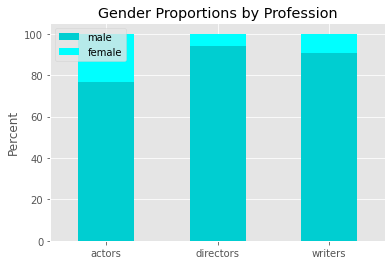

In [38]:
#gender proportions by profession plot
gender_plot_df.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Gender Proportions by Profession')
plt.xticks(rotation = 0, horizontalalignment='center')

In [39]:
#creating actor gender over the years df and plot

In [40]:
#create df of movie year and actor gender for each movie
actor_year = cleaned_df[['year','actor_gender']].copy()

In [41]:
actor_year

,year,actor_gender
0,1980,male
1,1980,male
2,1980,male
3,1980,NaN
4,1980,male
...,...,...
7830,2020,NaN
7831,2020,NaN
7832,2020,NaN
7833,2020,NaN


In [42]:
#group by year and gender
act_gen_df = actor_year.groupby(['year', 'actor_gender']).size().to_frame().unstack()

In [43]:
#flattens column headers
act_gen_df.columns = act_gen_df.columns.get_level_values(1)

In [44]:
#creates total column
act_gen_df["total"] = act_gen_df.sum(axis=1)

In [45]:
#creates male percent column
act_gen_df['male_percent'] = act_gen_df['male'] / act_gen_df['total']

In [46]:
#creates female percent column
act_gen_df['female_percent'] = act_gen_df['female'] / act_gen_df['total']

In [47]:
act_gen_df

actor_gender,female,male,total,male_percent,female_percent
year,,,,,
1980,8,37,45,0.822222,0.177778
1981,8,49,57,0.859649,0.140351
1982,8,54,62,0.870968,0.129032
1983,11,70,81,0.864198,0.135802
1984,12,82,94,0.872340,0.127660
1985,25,88,113,0.778761,0.221239
1986,20,88,108,0.814815,0.185185
1987,23,101,124,0.814516,0.185484
1988,29,97,126,0.769841,0.230159


In [48]:
#creates new df without female, male, total columns to make it easier to plot
act_gen_plot = act_gen_df.drop(columns=['female', 'male', 'total'])

In [49]:
#renames columns
act_gen_plot.rename(columns = {'female_percent':'female', 'male_percent':'male'}, inplace=True)

In [50]:
#convert decimals to percent
act_gen_plot = act_gen_plot * 100

In [51]:
act_gen_plot

actor_gender,male,female
year,,
1980,82.222222,17.777778
1981,85.964912,14.035088
1982,87.096774,12.903226
1983,86.419753,13.580247
1984,87.234043,12.765957
1985,77.876106,22.123894
1986,81.481481,18.518519
1987,81.451613,18.548387
1988,76.984127,23.015873


Text(0.5, 1.0, 'Actor Gender Proportions Over Time')

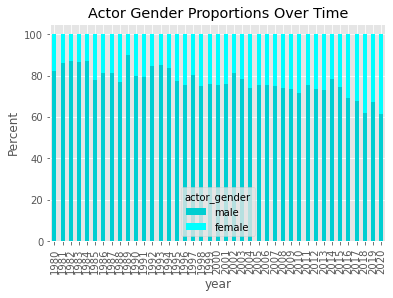

In [52]:
#actor gender each year plot
act_gen_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Actor Gender Proportions Over Time')

In [53]:
#creating director gender over the years df and plot

In [54]:
#create df of movie year and director gender for each movie
director_year = cleaned_df[['year','director_gender']].copy()

In [55]:
director_year

,year,director_gender
0,1980,NaN
1,1980,NaN
2,1980,NaN
3,1980,NaN
4,1980,male
...,...,...
7830,2020,NaN
7831,2020,NaN
7832,2020,NaN
7833,2020,NaN


In [56]:
#group by year and gender
dir_gen_df = director_year.groupby(['year', 'director_gender']).size().to_frame().unstack()

In [57]:
#flattens column headers
dir_gen_df.columns = dir_gen_df.columns.get_level_values(1)

In [58]:
#creates total column
dir_gen_df["total"] = dir_gen_df.sum(axis=1)

In [59]:
#creates male percent column
dir_gen_df['male_percent'] = dir_gen_df['male'] / dir_gen_df['total']

In [60]:
#creates female percent column
dir_gen_df['female_percent'] = dir_gen_df['female'] / dir_gen_df['total']

In [61]:
dir_gen_df

director_gender,female,male,total,male_percent,female_percent
year,,,,,
1980,NaN,21.0,21.0,1.000000,NaN
1981,NaN,32.0,32.0,1.000000,NaN
1982,1.0,34.0,35.0,0.971429,0.028571
1983,1.0,29.0,30.0,0.966667,0.033333
1984,1.0,45.0,46.0,0.978261,0.021739
1985,2.0,57.0,59.0,0.966102,0.033898
1986,2.0,47.0,49.0,0.959184,0.040816
1987,2.0,64.0,66.0,0.969697,0.030303
1988,2.0,72.0,74.0,0.972973,0.027027


In [62]:
#creates new df without female, male, total columns to make it easier to plot
dir_gen_plot = dir_gen_df.drop(columns=['female', 'male', 'total'])

In [63]:
#renames columns
dir_gen_plot.rename(columns = {'female_percent':'female', 'male_percent':'male'}, inplace=True)

In [64]:
#convert decimals to percent
dir_gen_plot = dir_gen_plot * 100

In [65]:
dir_gen_plot

director_gender,male,female
year,,
1980,100.000000,NaN
1981,100.000000,NaN
1982,97.142857,2.857143
1983,96.666667,3.333333
1984,97.826087,2.173913
1985,96.610169,3.389831
1986,95.918367,4.081633
1987,96.969697,3.030303
1988,97.297297,2.702703


Text(0.5, 1.0, 'Director Gender Proportions Over Time')

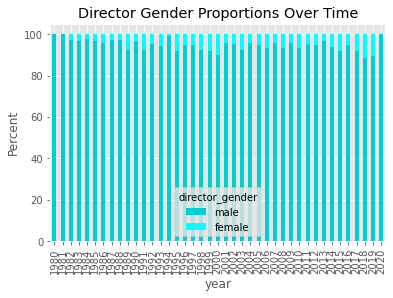

In [66]:
#director gender each year plot
dir_gen_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Director Gender Proportions Over Time')

In [67]:
#creating director gender over the years df and plot

In [68]:
#create df of movie year and writer gender for each movie
writer_year = cleaned_df[['year','writer_gender']].copy()

In [69]:
writer_year

,year,writer_gender
0,1980,NaN
1,1980,NaN
2,1980,NaN
3,1980,NaN
4,1980,NaN
...,...,...
7830,2020,NaN
7831,2020,NaN
7832,2020,NaN
7833,2020,NaN


In [70]:
#group by year and gender
wri_gen_df = writer_year.groupby(['year', 'writer_gender']).size().to_frame().unstack()

In [71]:
#flattens column headers
wri_gen_df.columns = wri_gen_df.columns.get_level_values(1)

In [72]:
#creates total column
wri_gen_df["total"] = wri_gen_df.sum(axis=1)

In [73]:
#creates male percent column
wri_gen_df['male_percent'] = wri_gen_df['male'] / wri_gen_df['total']

In [74]:
#creates female percent column
wri_gen_df['female_percent'] = wri_gen_df['female'] / wri_gen_df['total']

In [75]:
wri_gen_df

writer_gender,female,male,total,male_percent,female_percent
year,,,,,
1980,1.0,5.0,6.0,0.833333,0.166667
1981,NaN,11.0,11.0,1.000000,NaN
1982,NaN,7.0,7.0,1.000000,NaN
1983,1.0,14.0,15.0,0.933333,0.066667
1984,2.0,25.0,27.0,0.925926,0.074074
1985,2.0,16.0,18.0,0.888889,0.111111
1986,2.0,24.0,26.0,0.923077,0.076923
1987,1.0,34.0,35.0,0.971429,0.028571
1988,1.0,32.0,33.0,0.969697,0.030303


In [76]:
#creates new df without female, male, total columns to make it easier to plot
wri_gen_plot = wri_gen_df.drop(columns=['female', 'male', 'total'])

In [77]:
#renames columns
wri_gen_plot.rename(columns = {'female_percent':'female', 'male_percent':'male'}, inplace=True)

In [78]:
#convert decimals to percent
wri_gen_plot = wri_gen_plot * 100

In [79]:
wri_gen_plot

writer_gender,male,female
year,,
1980,83.333333,16.666667
1981,100.000000,NaN
1982,100.000000,NaN
1983,93.333333,6.666667
1984,92.592593,7.407407
1985,88.888889,11.111111
1986,92.307692,7.692308
1987,97.142857,2.857143
1988,96.969697,3.030303


Text(0.5, 1.0, 'Writer Gender Proportions Over Time')

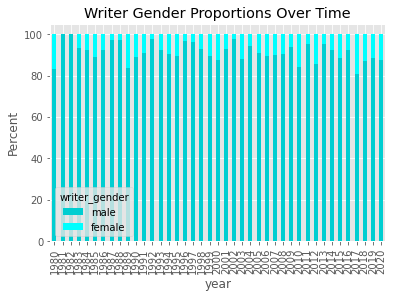

In [80]:
#writer gender each year plot
wri_gen_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Writer Gender Proportions Over Time')

In [81]:
#Question 2
#compare rates of male actors/directors/writers to female by genre

In [82]:
#creating actor gender by genre df and plot

In [83]:
#create df of movie genre and actor gender for each movie
actor_genre = cleaned_df[['genre','actor_gender']].copy()

In [84]:
actor_genre

,genre,actor_gender
0,Drama,male
1,Adventure,male
2,Action,male
3,Comedy,NaN
4,Comedy,male
...,...,...
7830,Drama,NaN
7831,Comedy,NaN
7832,Drama,NaN
7833,Drama,NaN


In [85]:
#group by genre and gender
act_genre_df = actor_genre.groupby(['genre', 'actor_gender']).size().to_frame().unstack()

In [86]:
#flattens column headers
act_genre_df.columns = act_genre_df.columns.get_level_values(1)

In [87]:
#creates total column
act_genre_df["total"] = act_genre_df.sum(axis=1)

In [88]:
#creates male percent column
act_genre_df['male_percent'] = act_genre_df['male'] / act_genre_df['total']

In [89]:
#creates female percent column
act_genre_df['female_percent'] = act_genre_df['female'] / act_genre_df['total']

In [90]:
act_genre_df

actor_gender,female,male,total,male_percent,female_percent
genre,,,,,
Action,164.0,1221.0,1385.0,0.881588,0.118412
Adventure,50.0,278.0,328.0,0.847561,0.152439
Animation,31.0,213.0,244.0,0.872951,0.127049
Biography,99.0,269.0,368.0,0.730978,0.269022
Comedy,473.0,1247.0,1720.0,0.725000,0.275000
Crime,78.0,368.0,446.0,0.825112,0.174888
Drama,367.0,738.0,1105.0,0.667873,0.332127
Family,3.0,2.0,5.0,0.400000,0.600000
Fantasy,4.0,21.0,25.0,0.840000,0.160000


In [91]:
#creates new df without female, male, total columns to make it easier to plot
act_genre_plot = act_genre_df.drop(columns=['female', 'male', 'total'])

In [92]:
#renames columns
act_genre_plot.rename(columns = {'female_percent':'female', 'male_percent':'male'}, inplace=True)

In [93]:
#convert decimals to percent
act_genre_plot = act_genre_plot * 100

In [94]:
act_genre_plot

actor_gender,male,female
genre,,
Action,88.158845,11.841155
Adventure,84.756098,15.243902
Animation,87.295082,12.704918
Biography,73.097826,26.902174
Comedy,72.500000,27.500000
Crime,82.511211,17.488789
Drama,66.787330,33.212670
Family,40.000000,60.000000
Fantasy,84.000000,16.000000


Text(0.5, 1.0, 'Actor Gender Proportions By Genre')

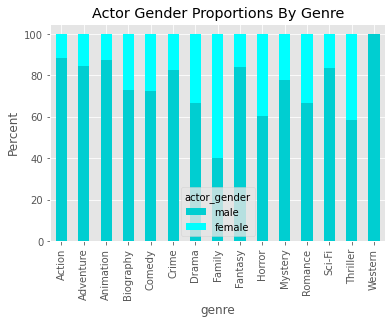

In [95]:
#actor gender by genre plot
act_genre_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Actor Gender Proportions By Genre')

In [96]:
#creating director gender by genre df and plot

In [97]:
#create df of movie genre and director gender for each movie
director_genre = cleaned_df[['genre','director_gender']].copy()

In [98]:
director_genre

,genre,director_gender
0,Drama,NaN
1,Adventure,NaN
2,Action,NaN
3,Comedy,NaN
4,Comedy,male
...,...,...
7830,Drama,NaN
7831,Comedy,NaN
7832,Drama,NaN
7833,Drama,NaN


In [99]:
#group by genre and gender
dir_genre_df = director_genre.groupby(['genre', 'director_gender']).size().to_frame().unstack()

In [100]:
#flattens column headers
dir_genre_df.columns = dir_genre_df.columns.get_level_values(1)

In [101]:
#creates total column
dir_genre_df["total"] = dir_genre_df.sum(axis=1)

In [102]:
#creates male percent column
dir_genre_df['male_percent'] = dir_genre_df['male'] / dir_genre_df['total']

In [103]:
#creates female percent column
dir_genre_df['female_percent'] = dir_genre_df['female'] / dir_genre_df['total']

In [104]:
dir_genre_df

director_gender,female,male,total,male_percent,female_percent
genre,,,,,
Action,30.0,1035.0,1065.0,0.971831,0.028169
Adventure,7.0,263.0,270.0,0.974074,0.025926
Animation,5.0,217.0,222.0,0.977477,0.022523
Biography,32.0,277.0,309.0,0.896440,0.103560
Comedy,103.0,1239.0,1342.0,0.923249,0.076751
Crime,14.0,333.0,347.0,0.959654,0.040346
Drama,70.0,745.0,815.0,0.914110,0.085890
Family,NaN,5.0,5.0,1.000000,NaN
Fantasy,3.0,16.0,19.0,0.842105,0.157895


In [105]:
#creates new df without female, male, total columns to make it easier to plot
dir_genre_plot = dir_genre_df.drop(columns=['female', 'male', 'total'])

In [106]:
#renames columns
dir_genre_plot.rename(columns = {'female_percent':'female', 'male_percent':'male'}, inplace=True)

In [107]:
#convert decimals to percent
dir_genre_plot = dir_genre_plot * 100

In [108]:
dir_genre_plot

director_gender,male,female
genre,,
Action,97.183099,2.816901
Adventure,97.407407,2.592593
Animation,97.747748,2.252252
Biography,89.644013,10.355987
Comedy,92.324888,7.675112
Crime,95.965418,4.034582
Drama,91.411043,8.588957
Family,100.000000,NaN
Fantasy,84.210526,15.789474


Text(0.5, 1.0, 'Director Gender Proportions By Genre')

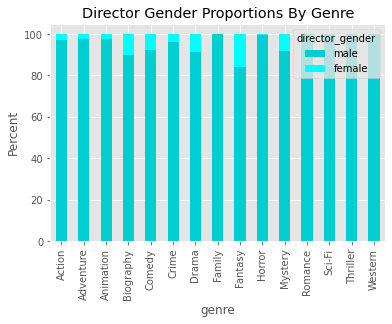

In [109]:
#XXXXXXXXXX
#too many columns NAN
#direcctor gender by genre plot
dir_genre_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Director Gender Proportions By Genre')

In [110]:
#creating writer gender by genre df and plot

In [111]:
#create df of movie genre and writer gender for each movie
writer_genre = cleaned_df[['genre','writer_gender']].copy()

In [112]:
writer_genre

,genre,writer_gender
0,Drama,NaN
1,Adventure,NaN
2,Action,NaN
3,Comedy,NaN
4,Comedy,NaN
...,...,...
7830,Drama,NaN
7831,Comedy,NaN
7832,Drama,NaN
7833,Drama,NaN


In [113]:
#group by genre and gender
wri_genre_df = writer_genre.groupby(['genre', 'writer_gender']).size().to_frame().unstack()

In [114]:
#flattens column headers
wri_genre_df.columns = wri_genre_df.columns.get_level_values(1)

In [115]:
#creates total column
wri_genre_df["total"] = wri_genre_df.sum(axis=1)

In [116]:
#creates male percent column
wri_genre_df['male_percent'] = wri_genre_df['male'] / wri_genre_df['total']

In [117]:
#creates female percent column
wri_genre_df['female_percent'] = wri_genre_df['female'] / wri_genre_df['total']

In [118]:
wri_genre_df

writer_gender,female,male,total,male_percent,female_percent
genre,,,,,
Action,26.0,658.0,684.0,0.961988,0.038012
Adventure,11.0,125.0,136.0,0.919118,0.080882
Animation,3.0,95.0,98.0,0.969388,0.030612
Biography,23.0,146.0,169.0,0.863905,0.136095
Comedy,122.0,768.0,890.0,0.862921,0.137079
Crime,9.0,199.0,208.0,0.956731,0.043269
Drama,56.0,396.0,452.0,0.876106,0.123894
Fantasy,NaN,11.0,11.0,1.000000,NaN
Horror,4.0,125.0,129.0,0.968992,0.031008


In [119]:
#creates new df without female, male, total columns to make it easier to plot
wri_genre_plot = wri_genre_df.drop(columns=['female', 'male', 'total'])

In [120]:
#renames columns
wri_genre_plot.rename(columns = {'female_percent':'female', 'male_percent':'male'}, inplace=True)

In [121]:
#convert decimals to percent
wri_genre_plot = wri_genre_plot * 100

In [122]:
wri_genre_plot

writer_gender,male,female
genre,,
Action,96.198830,3.801170
Adventure,91.911765,8.088235
Animation,96.938776,3.061224
Biography,86.390533,13.609467
Comedy,86.292135,13.707865
Crime,95.673077,4.326923
Drama,87.610619,12.389381
Fantasy,100.000000,NaN
Horror,96.899225,3.100775


Text(0.5, 1.0, 'Writer Gender Proportions By Genre')

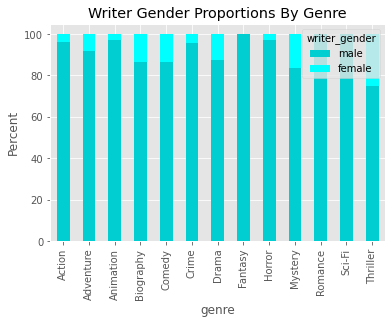

In [123]:
#XXXXXXXXX
#too many columsn NAN
#writer gender by genre plot
wri_genre_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Writer Gender Proportions By Genre')

In [124]:
#Question 3
#comparing the budgets of movies by gender of actor/director/writer

In [125]:
#creating actor gender and budget over the years df and plot

In [126]:
#create df of movie year, budget, and actor gender for each movie
actor_budget = cleaned_df[['year','budget','actor_gender']].copy()

In [127]:
actor_budget

,year,budget,actor_gender
0,1980,19000000.0,male
1,1980,4500000.0,male
2,1980,18000000.0,male
3,1980,3500000.0,NaN
4,1980,6000000.0,male
...,...,...,...
7830,2020,7000.0,NaN
7831,2020,NaN,NaN
7832,2020,58750.0,NaN
7833,2020,15000.0,NaN


In [128]:
#create df of mean budget by year for male and female actors
act_mean_bud = actor_budget.groupby(['year','actor_gender']).mean().unstack()

In [129]:
#flattens column headers
act_mean_bud.columns = act_mean_bud.columns.get_level_values(1)

In [130]:
#reset index
act_mean_bud = act_mean_bud.reset_index()

In [131]:
act_mean_bud

actor_gender,year,female,male
0,1980,1.000000e+07,1.365600e+07
1,1981,7.333333e+06,1.097571e+07
2,1982,9.112500e+06,1.323684e+07
3,1983,6.666667e+06,1.299275e+07
4,1984,1.016000e+07,1.489742e+07
5,1985,8.670000e+06,1.455836e+07
6,1986,1.226154e+07,1.398984e+07
7,1987,1.384615e+07,1.446693e+07
8,1988,1.293211e+07,1.545139e+07
9,1989,1.256786e+07,1.767375e+07


Text(0.5, 1.0, 'Mean Budget')

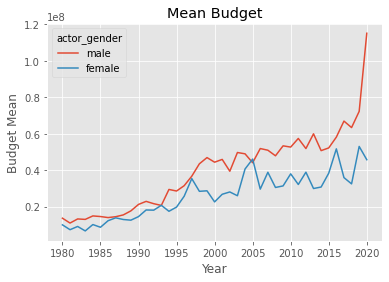

In [132]:
#mean budget by actor gender plot
act_mean_bud.plot(x = 'year', y = ['male','female'])
plt.xlabel('Year')
plt.ylabel('Budget Mean')
plt.title('Mean Budget')

In [133]:
#creating director gender and budget over the years df and plot

In [134]:
#create df of movie year, budget, and director gender for each movie
director_budget = cleaned_df[['year','budget','director_gender']].copy()

In [135]:
director_budget

,year,budget,director_gender
0,1980,19000000.0,NaN
1,1980,4500000.0,NaN
2,1980,18000000.0,NaN
3,1980,3500000.0,NaN
4,1980,6000000.0,male
...,...,...,...
7830,2020,7000.0,NaN
7831,2020,NaN,NaN
7832,2020,58750.0,NaN
7833,2020,15000.0,NaN


In [136]:
#create df of mean budget by year for male and female directors
dir_mean_bud = director_budget.groupby(['year','director_gender']).mean().unstack()

In [137]:
#flattens column headers
dir_mean_bud.columns = dir_mean_bud.columns.get_level_values(1)

In [138]:
#reset index
dir_mean_bud = dir_mean_bud.reset_index()

In [139]:
dir_mean_bud

director_gender,year,female,male
0,1980,NaN,1.098462e+07
1,1981,NaN,1.061750e+07
2,1982,4.500000e+06,1.153229e+07
3,1983,3.500000e+05,1.227964e+07
4,1984,NaN,1.513606e+07
5,1985,1.250000e+07,1.404231e+07
6,1986,NaN,1.419621e+07
7,1987,5.000000e+06,1.387995e+07
8,1988,NaN,1.558410e+07
9,1989,9.500000e+06,1.785479e+07


Text(0.5, 1.0, 'Mean Budget')

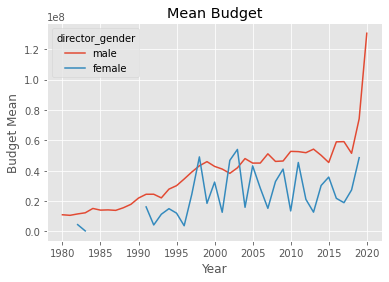

In [140]:
#mean budget by director gender plot
dir_mean_bud.plot(x = 'year', y = ['male','female'])
plt.xlabel('Year')
plt.ylabel('Budget Mean')
plt.title('Mean Budget')

In [141]:
#creating writer gender and budget over the years df and plot

In [142]:
#create df of movie year, budget, and writer gender for each movie
writer_budget = cleaned_df[['year','budget','writer_gender']].copy()

In [143]:
writer_budget

,year,budget,writer_gender
0,1980,19000000.0,NaN
1,1980,4500000.0,NaN
2,1980,18000000.0,NaN
3,1980,3500000.0,NaN
4,1980,6000000.0,NaN
...,...,...,...
7830,2020,7000.0,NaN
7831,2020,NaN,NaN
7832,2020,58750.0,NaN
7833,2020,15000.0,NaN


In [144]:
#create df of mean budget by year for male and female writers
wri_mean_bud = writer_budget.groupby(['year','writer_gender']).mean().unstack()

In [145]:
#flattens column headers
wri_mean_bud.columns = wri_mean_bud.columns.get_level_values(1)

In [146]:
#reset index
wri_mean_bud = wri_mean_bud.reset_index()

In [147]:
wri_mean_bud

writer_gender,year,female,male
0,1980,1.000000e+07,5.575000e+06
1,1981,NaN,9.731250e+06
2,1982,NaN,1.050000e+07
3,1983,1.000000e+07,1.416250e+07
4,1984,6.000000e+06,9.187647e+06
5,1985,6.250000e+06,1.320000e+07
6,1986,2.000000e+07,1.026250e+07
7,1987,NaN,1.191250e+07
8,1988,NaN,1.282333e+07
9,1989,1.175000e+07,1.558088e+07


Text(0.5, 1.0, 'Mean Budget')

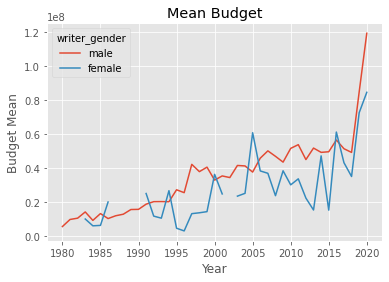

In [148]:
#mean budget by writer gender plot
wri_mean_bud.plot(x = 'year', y = ['male','female'])
plt.xlabel('Year')
plt.ylabel('Budget Mean')
plt.title('Mean Budget')

In [149]:
#Question 4
#comparing rates of female leads when the director/writer is female vs male

In [150]:
#male directors table

In [151]:
#create df of movies with male directors only
male_dir = cleaned_df[cleaned_df['director_gender'] == 'male']

In [152]:
#drop rows where actor gender is NaN
male_dir = male_dir.dropna(subset=['actor_gender'])

In [153]:
#get gender counts for lead actors
md_gen_count = male_dir['actor_gender'].value_counts().to_frame()

In [154]:
md_gen_count

,actor_gender
male,2973
female,775


In [155]:
#get total number
total = male_dir['actor_gender'].count()

In [156]:
total

3748

In [157]:
#calculates percents and creates actor gender percent by director gender df
dir_gen_per = md_gen_count / total

In [158]:
#renames column
dir_gen_per = dir_gen_per.rename(columns = {'actor_gender':'male director'})

In [159]:
dir_gen_per

,male director
male,0.793223
female,0.206777


In [160]:
#female directors table

In [161]:
#create df of movies with female directors only
female_dir = cleaned_df[cleaned_df['director_gender'] == 'female']

In [162]:
#drop rows where actor gender is NaN
female_dir = female_dir.dropna(subset=['actor_gender'])

In [163]:
#get gender counts for lead actors
fd_gen_count = female_dir['actor_gender'].value_counts().to_frame()

In [164]:
fd_gen_count

,actor_gender
male,108
female,101


In [165]:
#get total number
total = female_dir['actor_gender'].count()

In [166]:
total

209

In [167]:
#calculates percents and creates column for actor gender percent for female director
dir_gen_per['female director'] = fd_gen_count / total

In [168]:
dir_gen_per

,male director,female director
male,0.793223,0.516746
female,0.206777,0.483254


In [169]:
#transposes df to make it plottable
dir_gen_plot = dir_gen_per.transpose()
dir_gen_plot

,male,female
male director,0.793223,0.206777
female director,0.516746,0.483254


In [170]:
#convert decimals to percents
dir_gen_plot = dir_gen_plot * 100
dir_gen_plot

,male,female
male director,79.322305,20.677695
female director,51.674641,48.325359


(array([0, 1]), [Text(0, 0, 'male director'), Text(1, 0, 'female director')])

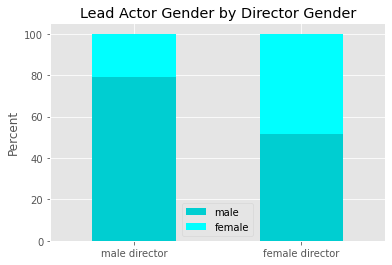

In [171]:
#lead actor gender by director gender plot
dir_gen_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Lead Actor Gender by Director Gender')
plt.xticks(rotation = 0, horizontalalignment='center')

In [172]:
#male writers table

In [173]:
#create df of movies with male writers only
male_wri = cleaned_df[cleaned_df['writer_gender'] == 'male']

In [174]:
#drop rows where actor gender is NaN
male_wri = male_wri.dropna(subset=['actor_gender'])

In [175]:
#get gender counts for lead actors
mw_gen_count = male_wri['actor_gender'].value_counts().to_frame()

In [176]:
mw_gen_count

,actor_gender
male,1774
female,437


In [177]:
#get total number
total = male_wri['actor_gender'].count()

In [178]:
total

2211

In [179]:
#calculates percents and creates actor gender percent by writer gender df
wri_gen_per = mw_gen_count / total

In [180]:
#renames column
wri_gen_per = wri_gen_per.rename(columns = {'actor_gender':'male writer'})

In [181]:
wri_gen_per

,male writer
male,0.802352
female,0.197648


In [182]:
#female writers table

In [183]:
#create df of movies with female writers only
female_wri = cleaned_df[cleaned_df['writer_gender'] == 'female']

In [184]:
#drop rows where actor gender is NaN
female_wri = female_wri.dropna(subset=['actor_gender'])

In [185]:
#get gender counts for lead actors
fw_gen_count = female_wri['actor_gender'].value_counts().to_frame()

In [186]:
fw_gen_count

,actor_gender
female,126
male,87


In [187]:
#get total number
total = female_wri['actor_gender'].count()

In [188]:
total

213

In [189]:
#calculates percents and creates column for actor gender percent for female writer
wri_gen_per['female writer'] = fw_gen_count / total

In [190]:
wri_gen_per

,male writer,female writer
male,0.802352,0.408451
female,0.197648,0.591549


In [191]:
#transposes df to make it plottable
wri_gen_plot = wri_gen_per.transpose()
wri_gen_plot

,male,female
male writer,0.802352,0.197648
female writer,0.408451,0.591549


In [192]:
#convert decimals to percents
wri_gen_plot = wri_gen_plot * 100
wri_gen_plot

,male,female
male writer,80.235188,19.764812
female writer,40.845070,59.154930


(array([0, 1]), [Text(0, 0, 'male writer'), Text(1, 0, 'female writer')])

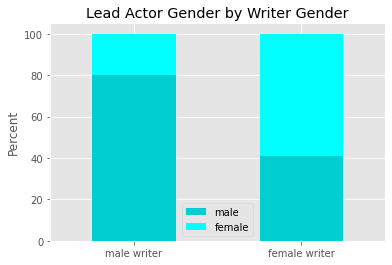

In [193]:
#lead actor gender by writer gender plot
wri_gen_plot.plot.bar(stacked=True, color={'male':'darkturquoise','female':'aqua'})
plt.ylabel('Percent')
plt.title('Lead Actor Gender by Writer Gender')
plt.xticks(rotation = 0, horizontalalignment='center')